# Exercise 1: Build and Plot k-Means


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 1:** create blobs with the size of 500, and center of 3

In [12]:
#set seed
seed = 1234

from sklearn.datasets import make_blobs

#create fake dataset
X, Y = make_blobs(n_samples=500, centers=3, random_state=seed)

**Step 2:** Plot the distribution of the blobs

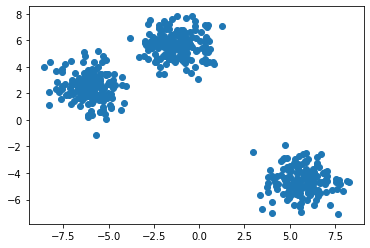

In [13]:
#visualize the distribution
plt.scatter(X[:,0], X[:,1])
plt.show()

**Step 3:** Use K-means, find the centers of these clusters

In [14]:
#instantiate KMeans, fit
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 4:** Plot the blobs with the found centers

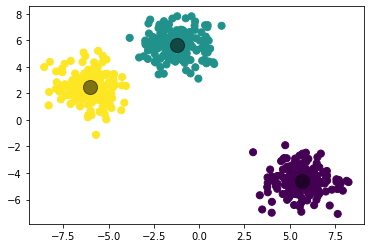

In [15]:
#plot the predicted labels for the clusters

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

In [18]:
print(kmeans.labels_)

[2 0 0 2 2 2 0 2 2 0 1 2 2 1 1 1 1 0 2 0 0 2 2 0 2 2 2 2 2 0 1 2 2 1 1 1 2
 2 1 1 0 2 1 0 1 0 2 2 0 0 1 1 1 0 1 0 2 1 1 2 1 0 1 0 2 1 1 2 1 0 0 0 0 2
 0 0 2 1 2 0 1 0 2 0 0 2 0 0 2 1 1 1 2 0 0 0 0 2 2 1 1 0 1 1 2 1 2 0 1 1 2
 1 0 1 1 0 2 2 2 1 1 1 0 0 0 2 1 2 0 0 0 2 2 2 2 1 1 2 1 2 2 1 0 0 1 1 0 1
 2 0 2 0 0 1 1 0 2 0 1 2 2 2 0 0 1 1 2 2 0 2 2 1 2 0 1 1 0 2 0 1 0 1 2 1 2
 0 0 0 2 0 2 1 2 2 2 2 2 0 2 2 1 2 2 1 0 1 2 2 1 2 1 0 1 2 2 0 1 2 1 2 1 1
 1 2 0 1 0 1 2 0 1 2 0 2 0 2 0 1 2 0 2 2 2 1 0 0 0 2 2 2 2 2 1 0 0 0 2 0 2
 0 1 0 1 0 1 1 1 1 2 0 1 0 1 1 0 1 0 1 0 1 2 2 1 0 0 0 2 0 1 0 1 1 0 1 0 1
 1 2 2 1 2 2 1 0 2 0 1 2 1 2 0 1 0 2 0 1 2 2 1 1 2 1 0 2 1 1 1 1 0 2 0 2 0
 2 0 1 0 1 1 0 0 1 0 0 0 2 2 2 2 0 0 1 0 1 1 0 1 1 2 2 1 1 1 2 0 0 2 2 1 0
 1 0 2 2 0 1 1 1 0 1 2 2 2 0 2 1 2 2 1 0 0 2 0 1 1 0 1 2 2 1 1 0 2 2 0 1 0
 0 2 1 1 0 2 1 1 1 2 1 0 2 1 1 1 0 0 1 0 2 0 2 0 0 2 2 1 1 0 2 2 0 2 2 2 1
 2 1 0 0 0 0 0 2 1 1 1 0 1 0 2 2 2 0 1 0 0 1 0 1 1 2 1 2 1 0 2 0 2 1 0 0 0
 0 0 0 0 2 1 1 0 0 1 1 2 

Step 6: How about classes? How to find out where there are classes.

In [19]:
print(set(kmeans.labels_))

{0, 1, 2}


# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [20]:
from sklearn.datasets import load_iris



**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [26]:
data = load_iris()
X = data.data
Y = data.target

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#initialize cluster and empty list
total_k = 10
wcss = []

#loop through desired number of clusters
for k in range(1, total_k):
    cluster = KMeans(k, random_state=seed)
    cluster.fit(X)
    wcss.append(cluster.inertia_)


    



**Step 4:** Plot a graph to look at 'The elbow'

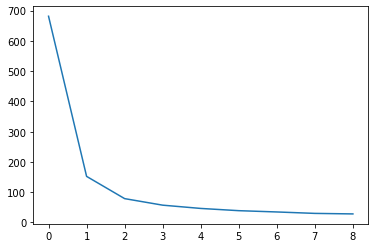

In [33]:
#plot graph
plt.plot(wcss)
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [36]:
cluster = KMeans(3, random_state=seed)
cluster.fit(X)
Y_pred = cluster.predict(X)

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


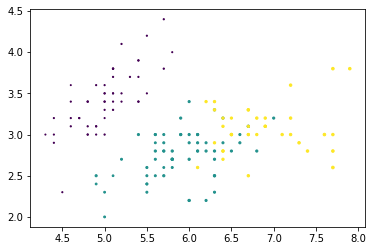

In [39]:
plt.scatter(X[:,0], X[:,1], X[:,2], c=Y_pred)
plt.show()

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

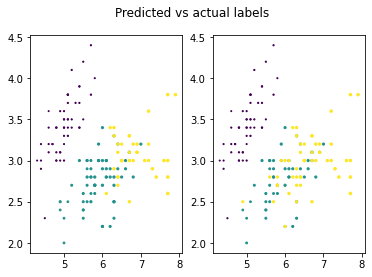

In [49]:

fig, ax = plt.subplots(1,2)
fig.suptitle('Predicted vs actual labels')


ax[0].scatter(X[:,0], X[:,1], X[:,2], c=Y_pred)
ax[1].scatter(X[:,0], X[:,1], X[:,2], c=Y)